In [1]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                    
import seaborn as sns                       
import pandas as pd                      
import numpy as np  

In [2]:
b_df=pd.read_csv('data02.csv')
b_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,NAME_FAMILY_STATUS,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,Single / not married,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,Married,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,Single / not married,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,Civil marriage,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,Single / not married,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,Married,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,1395000.0,...,Married,1,1,0,1,0,Accountants,3.0,SUNDAY,2
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,1530000.0,...,Married,1,1,1,1,0,Managers,2.0,MONDAY,1
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,913500.0,...,Married,1,0,0,1,0,NaN,2.0,WEDNESDAY,1
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,405000.0,...,Single / not married,1,1,0,1,0,Laborers,1.0,THURSDAY,0


In [3]:
b_df.shape

(100000, 23)

In [4]:
b_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'MOBILE', 'WORK_PHONE', 'HOME_PHONE',
       'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

# Checking for missing values

In [5]:
b_df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [6]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  MOBILE               100000 non-null  int64  
 15  WORK_PHONE        

# Filling missing values

In [7]:
goodsprice_avg=b_df['AMT_GOODS_PRICE'].mean()
print(goodsprice_avg)
b_df['AMT_GOODS_PRICE']=b_df['AMT_GOODS_PRICE'].fillna(goodsprice_avg)

538345.1489706662


In [8]:
print(b_df['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      80789
Family             13102
Spouse, partner     3704
Children            1072
Other_B              556
Other_A              287
Group of people       85
Name: NAME_TYPE_SUITE, dtype: int64


In [9]:
b_df['NAME_TYPE_SUITE']=b_df['NAME_TYPE_SUITE'].fillna('NAN')

In [10]:
print(b_df['OCCUPATION_TYPE'].value_counts())

Laborers                 17977
Sales staff              10383
Core staff                8952
Managers                  6969
Drivers                   6057
High skill tech staff     3650
Accountants               3258
Medicine staff            2851
Security staff            2201
Cooking staff             1954
Cleaning staff            1512
Private service staff      863
Low-skill Laborers         705
Waiters/barmen staff       437
Secretaries                415
Realty agents              242
HR staff                   181
IT staff                   169
Name: OCCUPATION_TYPE, dtype: int64


In [11]:
b_df['OCCUPATION_TYPE']=b_df['OCCUPATION_TYPE'].fillna('NAN')

In [12]:
fam_avg=b_df['CNT_FAM_MEMBERS'].mean()
print(fam_avg)
b_df['CNT_FAM_MEMBERS']=b_df['CNT_FAM_MEMBERS'].fillna(fam_avg)

2.1556715567155673


In [13]:
b_df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

# Separating categorical and continuous columns

In [14]:
def seprated_data_types(b_df):
    categorical=[]
    continous=[]
    for column in b_df.columns:
        if b_df[column].nunique()<30:
            categorical.append(column)
        else :
            continous.append(column)
            
    return   categorical,continous
categorical, continous=seprated_data_types(b_df)


from tabulate import tabulate
table = [categorical, continous]
print(tabulate({"Categorical":categorical,
                "Continous": continous}, headers = 'keys')) 

Categorical          Continous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


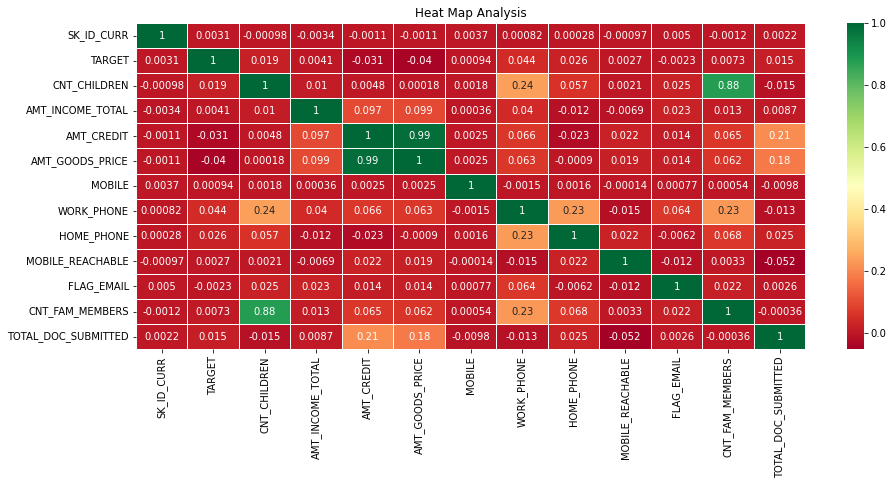

In [15]:
fig,ax=plt.subplots(figsize=(15,6))
sns.heatmap(b_df.corr(),cmap='RdYlGn',annot=True,linewidth=0.5).set_title('Heat Map Analysis')
plt.show()

In [16]:
def myOutliers(b_df,col):
    Q3=np.quantile(b_df[col],.75)
    Q1=np.quantile(b_df[col],.25)
    IQR=Q3-Q1
    mylist=[]
    my_outliers_b_df=[]
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    print("The lower range of",col, "is", lower_range)
    print("The upper range of",col, "is",upper_range)
    mylist=[x for x in b_df[col] if ((x<lower_range) |(x>upper_range))]
    print("Total outliers in ",col,"are",len(mylist))
    my_outliers_b_df=b_df.index[b_df[col].isin(mylist)]
    print(my_outliers_b_df.shape)
    print("Row and column befor outliers",b_df.shape)
    return my_outliers_b_df
k=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_GOODS_PRICE"]
for i in k:
    print("i is",i)
    b_df=b_df.drop(myOutliers(b_df,i))
    print("***************************************************************")

i is AMT_INCOME_TOTAL
The lower range of AMT_INCOME_TOTAL is -22500.0
The upper range of AMT_INCOME_TOTAL is 337500.0
Total outliers in  AMT_INCOME_TOTAL are 4571
(4571,)
Row and column befor outliers (100000, 23)
***************************************************************
i is AMT_CREDIT
The lower range of AMT_CREDIT is -513000.0
The upper range of AMT_CREDIT is 1575000.0
Total outliers in  AMT_CREDIT are 1646
(1646,)
Row and column befor outliers (95429, 23)
***************************************************************
i is AMT_GOODS_PRICE
The lower range of AMT_GOODS_PRICE is -438750.0
The upper range of AMT_GOODS_PRICE is 1343250.0
Total outliers in  AMT_GOODS_PRICE are 2201
(2201,)
Row and column befor outliers (93783, 23)
***************************************************************


In [17]:
b_df.shape

(91582, 23)

# Univariate Analysis

# Analysis of categorical columns

In [18]:
def info_of_cat(col):
    print(f"unique values in {col} are :{b_df[col].unique()}")
    print(f"mode{col} is {b_df[col].mode()[0]}")
    print(f"number iof missing value in {col} is {b_df[col].isnull().sum()}")

## 1. Analysis of TARGET

In [19]:
info_of_cat('TARGET')

unique values in TARGET are :[1 0]
modeTARGET is 0
number iof missing value in TARGET is 0


In [20]:
b_df['TARGET'].value_counts()

0    83928
1     7654
Name: TARGET, dtype: int64

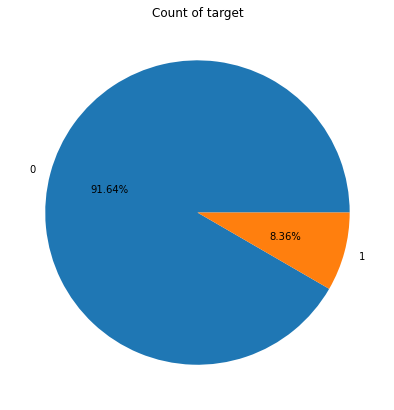

In [21]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title("Count of target") 
percentage = b_df["TARGET"].value_counts() 
labels = list(b_df["TARGET"].value_counts().index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

### Interpretation: 91.91% customers of the bank who are not likely to be defaulters and 8.09% have difficulties paying loan installments and are likely to be defaulters

## 2. Analysis of NAME_CONTRACT_TYPE

In [22]:
info_of_cat('NAME_CONTRACT_TYPE')

unique values in NAME_CONTRACT_TYPE are :['Cash loans' 'Revolving loans']
modeNAME_CONTRACT_TYPE is Cash loans
number iof missing value in NAME_CONTRACT_TYPE is 0


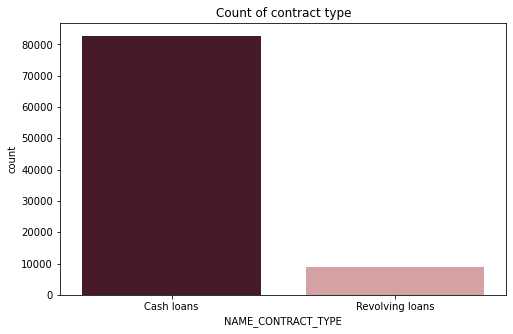

In [23]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.set_title("Count of contract type") 
percentage = b_df["NAME_CONTRACT_TYPE"].value_counts() 
labels = list(b_df["NAME_CONTRACT_TYPE"].value_counts().index) 
sns.countplot(x = b_df["NAME_CONTRACT_TYPE"],palette=['#4d1325','#dd9999'])
plt.show()

### Interpretation: Most customers take out cash loans than revolving loans

## 3. Analysis of TOTAL_DOC_SUBMITTED

In [24]:
info_of_cat('TOTAL_DOC_SUBMITTED')

unique values in TOTAL_DOC_SUBMITTED are :[1 0 2 3 4]
modeTOTAL_DOC_SUBMITTED is 1
number iof missing value in TOTAL_DOC_SUBMITTED is 0


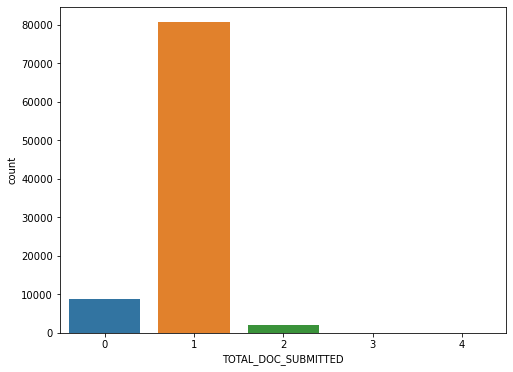

In [25]:
d = b_df["TOTAL_DOC_SUBMITTED"].value_counts() 
fig, ax = plt.subplots(figsize = (8, 6))
labels = list(b_df["TOTAL_DOC_SUBMITTED"].value_counts().index) 
sns.countplot(x = b_df["TOTAL_DOC_SUBMITTED"])
plt.show()

### Interpretation: Most customers have submitted 1 document

# Analysis of numerical columns

In [26]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {b_df[col].mean()}")
    print(f"The median of the {col} is {b_df[col].median()}")
    print(f"The mode of the {col} is {b_df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {b_df[col].std()}")
    print(f"Number of missing values in the {col} is {b_df[col].isnull().sum()}")

## 1. Analysis of AMT_INCOME_TOTAL

In [27]:
info_of_numerical('AMT_INCOME_TOTAL')

The mean of the AMT_INCOME_TOTAL is 151648.33146906598
The median of the AMT_INCOME_TOTAL is 135000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 62922.57274220565
Number of missing values in the AMT_INCOME_TOTAL is 0


In [28]:
b_df['AMT_INCOME_TOTAL'].describe()

count     91582.000000
mean     151648.331469
std       62922.572742
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      180000.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

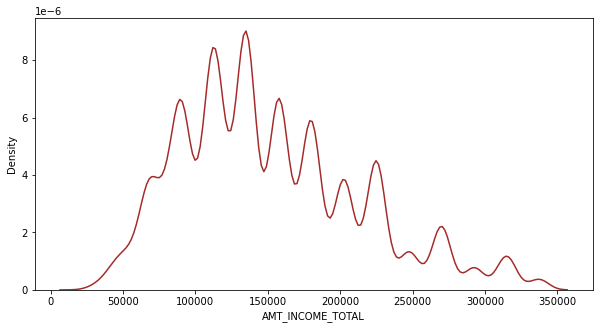

In [29]:
fig, ax = plt.subplots(figsize= (10, 5))               
sns.kdeplot(x = b_df["AMT_INCOME_TOTAL"],color = "brown")
plt.show()

### Interpretation: The graph high peaks between 45000-200000, this means that most of the customers earn income in this range.

## 2. Analysis of Amt_Credit

In [30]:
info_of_numerical('AMT_CREDIT')

The mean of the AMT_CREDIT is 535513.0279476317
The median of the AMT_CREDIT is 481495.5
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 320078.56150824245
Number of missing values in the AMT_CREDIT is 0


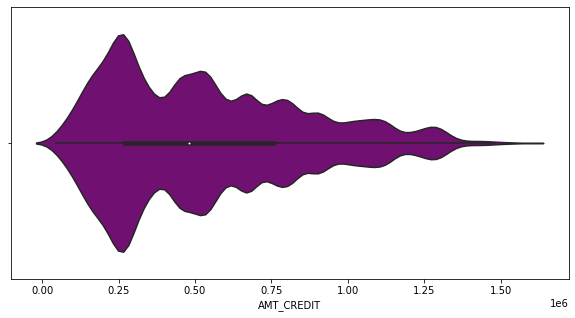

In [31]:
fig, ax = plt.subplots(figsize= (10, 5))               
sns.violinplot(x = b_df["AMT_CREDIT"],color = "purple") 
plt.show()

### Interpretation: Majority of the client's credit loan lies between 0.25 to 0.50

## 3. Analysis of Amt_Goods_Price

In [32]:
info_of_numerical('AMT_GOODS_PRICE')

The mean of the AMT_GOODS_PRICE is 477983.57838624116
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 225000.0
The standard deviation of the AMT_GOODS_PRICE is 287002.0438198013
Number of missing values in the AMT_GOODS_PRICE is 0


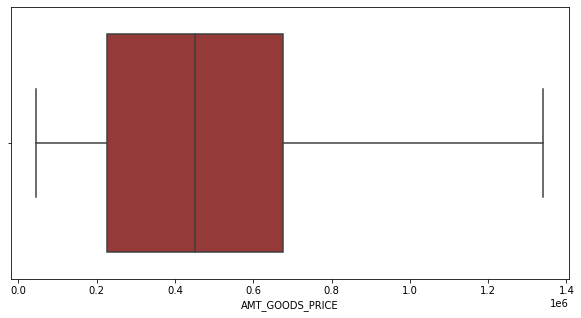

In [33]:
fig, ax = plt.subplots(figsize= (10, 5))               
sns.boxplot(x = b_df["AMT_GOODS_PRICE"],color = "brown") 
plt.show()

### Interpretation: Most customers' who take loan based on their goods prices lies between 0.2 to 0.7 

# Bivariate Analysis

## 1. Analysis of NAME_CONTRACT_TYPE and AMT_INCOME_TOTAL

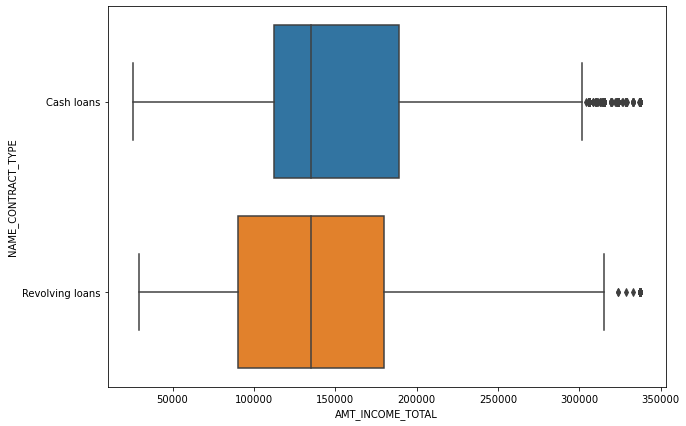

In [34]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.boxplot(x = "AMT_INCOME_TOTAL", y = "NAME_CONTRACT_TYPE", data = b_df)
plt.show()

### Interpretation: Income of customers who take cash loans lies between 110000 to 190000, whereas income of customers who take out revolving loans lie between 90000 to 180000 

## 2. Analysis of AMT_CREDIT and AMT_INCOME_TOTAL

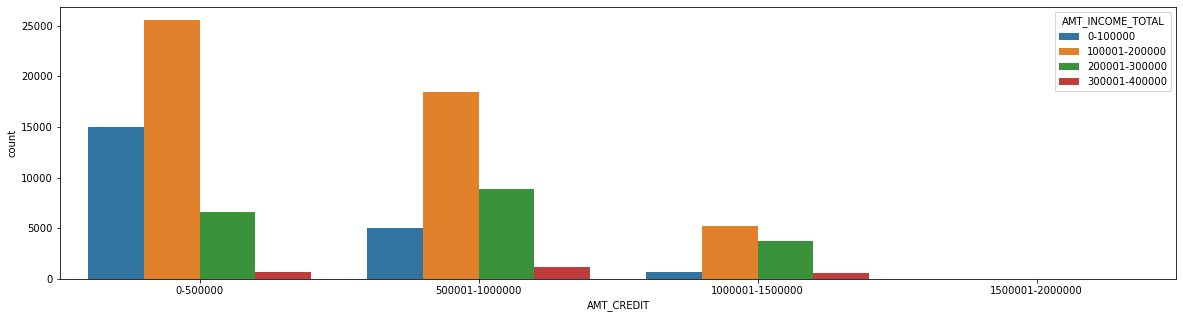

In [35]:
bins1=[0,500000,1000000,1500000,2000000]
labels1=['0-500000','500001-1000000','1000001-1500000','1500001-2000000']
cr=pd.cut(b_df['AMT_CREDIT'],bins=bins1,labels=labels1)
cr.value_counts()
bins=[0,100000,200000,300000,400000]
labels=['0-100000','100001-200000','200001-300000','300001-400000']
inc=pd.cut(b_df['AMT_INCOME_TOTAL'],bins=bins,labels=labels)
inc.value_counts()
fig, ax = plt.subplots(figsize = (20,5))
sns.countplot(x=cr,hue=inc,data = b_df)
plt.show()

### Interpretation: Customers having 0-500000 credit amount for their loan have total income between 100001-200000

## 3. Analysis of AMT_CREDIT and TOTAL_DOC_SUBMITTED

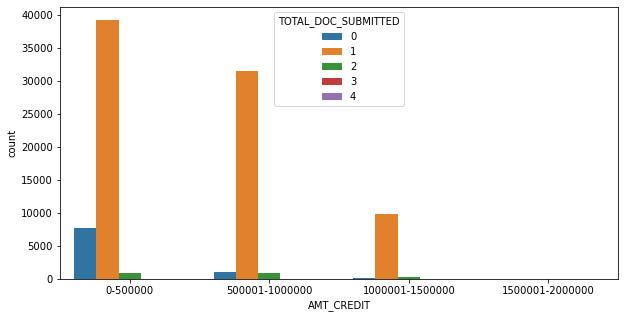

In [36]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(hue = b_df["TOTAL_DOC_SUBMITTED"], x = cr)
plt.show()

### Interpretation: Customers who have submitted one document to take loan have high amount credit.

## 4. Analysing AMT_INCOME_TYPE and NAME_INCOME_TYPE

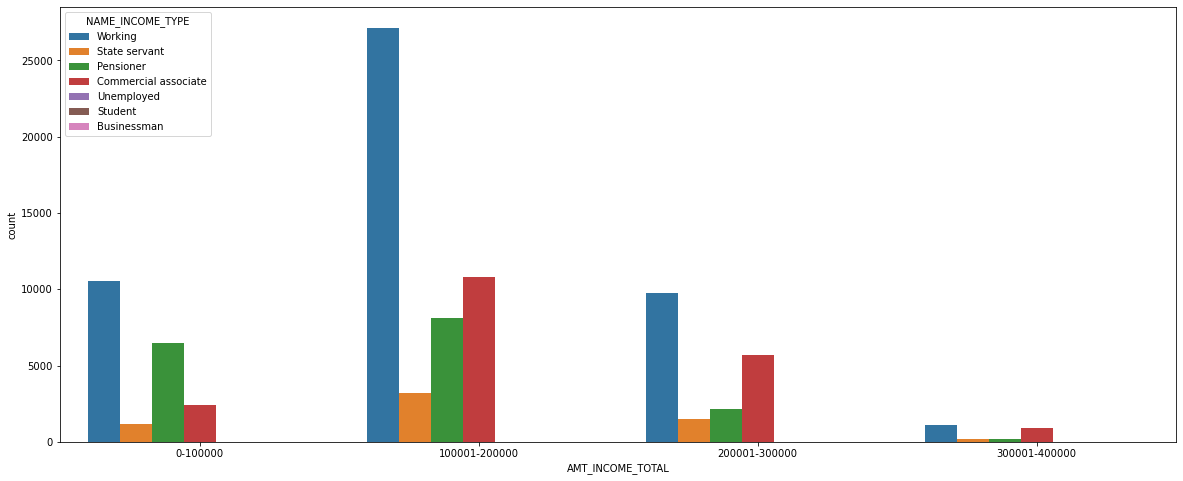

In [37]:
bins=[0,100000,200000,300000,400000]
labels=['0-100000','100001-200000','200001-300000','300001-400000']
inc=pd.cut(b_df['AMT_INCOME_TOTAL'],bins=bins,labels=labels)
inc.value_counts()
fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(hue='NAME_INCOME_TYPE',x=inc,data = b_df)
plt.show()

### Interpretation: Customers who belong to working type have highest income.

# Multivariate analysis

### 1. Analysing the effect of target on AMT_INCOME_TOTAL, AMT_GOODS_PRICE, and TOTAL_DOC_SUBMITTED

In [38]:
bins=[0,100000,200000,300000,400000]
labels=['0-100000','100001-200000','200001-300000','300001-400000']
inc=pd.cut(b_df['AMT_INCOME_TOTAL'],bins=bins,labels=labels)
print(inc.value_counts())
l=['NAME_CONTRACT_TYPE',inc]
bins=[0,1000000,2000000,3000000,4000000]
labels=['0-1000000','1000001-2000000','2000001-3000000','3000001-4000000']
gp=pd.cut(b_df['AMT_GOODS_PRICE'],bins=bins,labels=labels)
print(gp.value_counts())


100001-200000    49298
0-100000         20662
200001-300000    19198
300001-400000     2424
Name: AMT_INCOME_TOTAL, dtype: int64
0-1000000          85960
1000001-2000000     5622
2000001-3000000        0
3000001-4000000        0
Name: AMT_GOODS_PRICE, dtype: int64


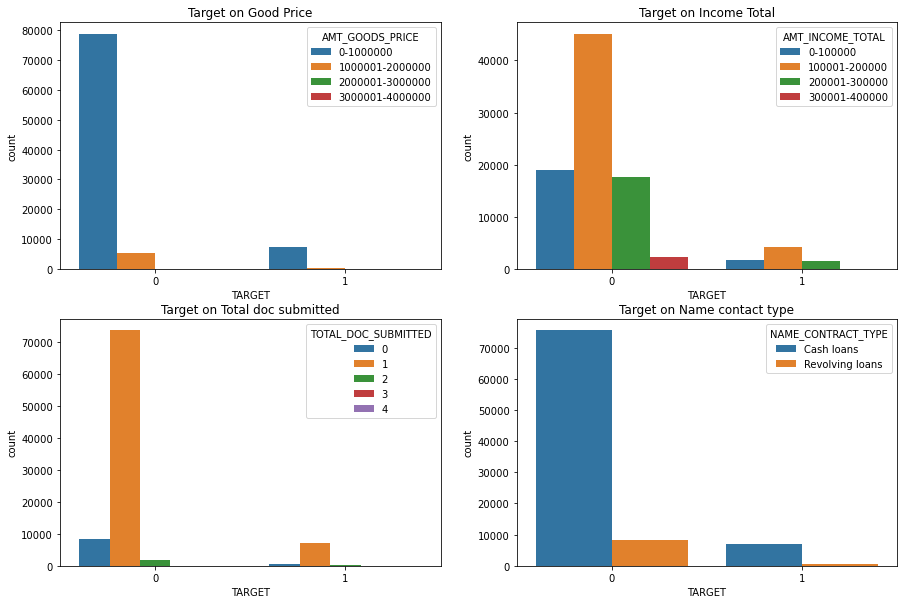

In [39]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(x='TARGET',hue=gp,data=b_df,ax=ax[0,0]).set_title('Target on Good Price')
sns.countplot(x='TARGET',hue=inc,data=b_df,ax=ax[0][1]).set_title('Target on Income Total')
sns.countplot(x='TARGET',hue='TOTAL_DOC_SUBMITTED',data=b_df,ax=ax[1][0]).set_title('Target on Total doc submitted')
sns.countplot(x='TARGET',hue='NAME_CONTRACT_TYPE',data=b_df,ax=ax[1,1]).set_title('Target on Name contact type')

plt.show()

### Interpretation a: Customers who have no difficulty paying loan installments take loan upto 1000000 for their goods and they are the ones who will not become a defaulter

### Interpretation b: Customers who have no difficulty paying loan installments earn mostly between 100000 to 200000, followed by customers who earn upto 100000 and less are the customers whose income is between 200000-300000. On comparision of customers who have no difficulty paying and customers who do, we can infer that customers who have problem paying on time have less income in the given range and are possibly to become defaulters.

### Interpretation c: Most customers who have no difficulty paying loan installments have submitted at least 1 document, however only a handfull of customers who have difficulty paying loan installments have submitted one document and are to probably become defaulters.

### Interpretation d: Customers who have no difficulty paying loan installments take cash loans more than revolving loans, however customers who have difficulty paying loan installments who opt for both types of loan are less and are likely to become defaulters

## 2. Analysing the effect of target on House, GENDER, NAME_INCOME_TYPE, AMT_CREDIT,  and NAME_FAMILY_STATUS

In [40]:
bins1=[0,500000,1000000,1500000,2000000]
labels1=['0-500000','500001-1000000','1000001-1500000','1500001-2000000']
cr=pd.cut(b_df['AMT_CREDIT'],bins=bins1,labels=labels1)
cr.value_counts()

0-500000           47728
500001-1000000     33444
1000001-1500000    10352
1500001-2000000       58
Name: AMT_CREDIT, dtype: int64

C:\Users\Amaan Haider\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amaan Haider\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amaan Haider\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\A

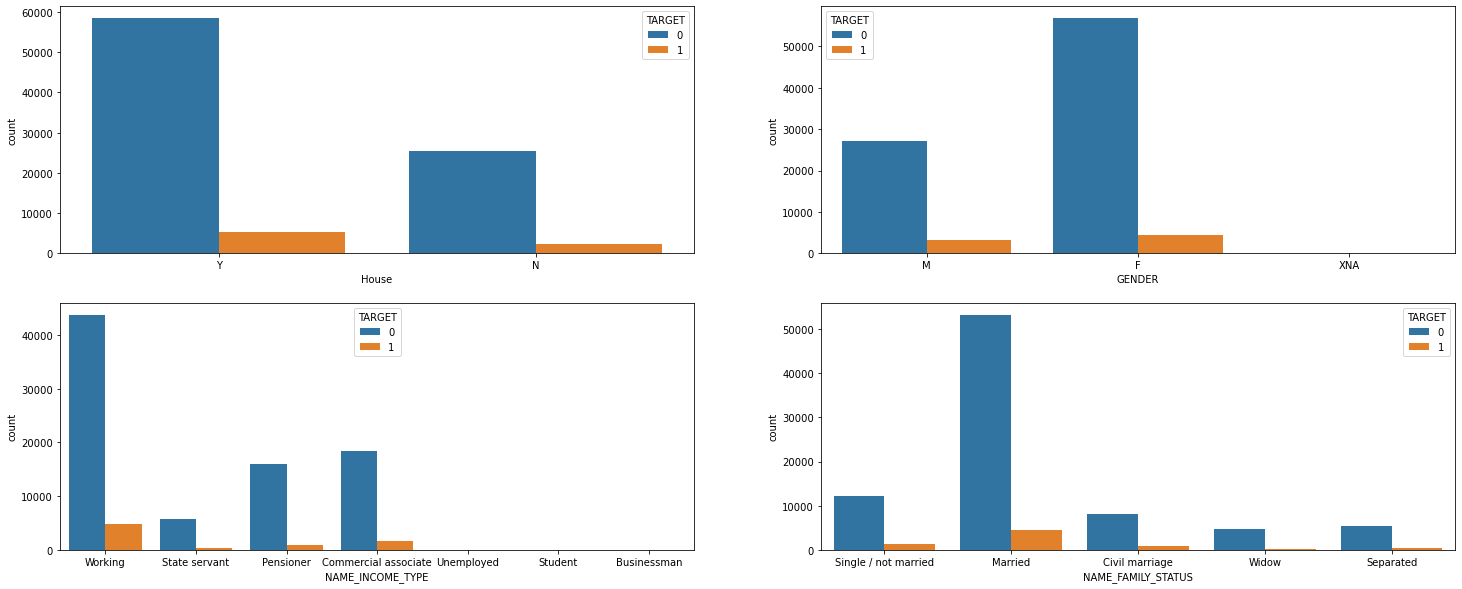

In [41]:
l=['House','GENDER','NAME_INCOME_TYPE','NAME_FAMILY_STATUS']
enumerate(l)
list_l=list(enumerate(l))
plt.figure(figsize=(25,10))
for hey in list_l:
    plt.subplot(2,2,hey[0]+1)
    sns.countplot(hey[1],hue='TARGET',data=b_df)
plt.show()

### Interpretation a: Customers who have no difficulty paing loan installments have their own house or a flat are the ones that are not likely to be a defaulter, whereas customers who have difficulty paying loan installments don't have their own house or flat. 

### Interpretation b: Customers who dont have problem paying loan installments are majoritily female, followed by male. However only few from both genders have problem paying loan intallments on time. Female customers are less likely to be defaulters

### Interpretation c: Customers who dont have problem paying loan installments have mostly belong to working income type, followed by commercial associates and pensioners. These are the customers that are less likely to become defaulters.

### Interpretation d: Customers who dont have problem paying loan installments are majoritily married, followed by those who are single. And they are not likely to become defaulters.

C:\Users\Amaan Haider\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amaan Haider\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


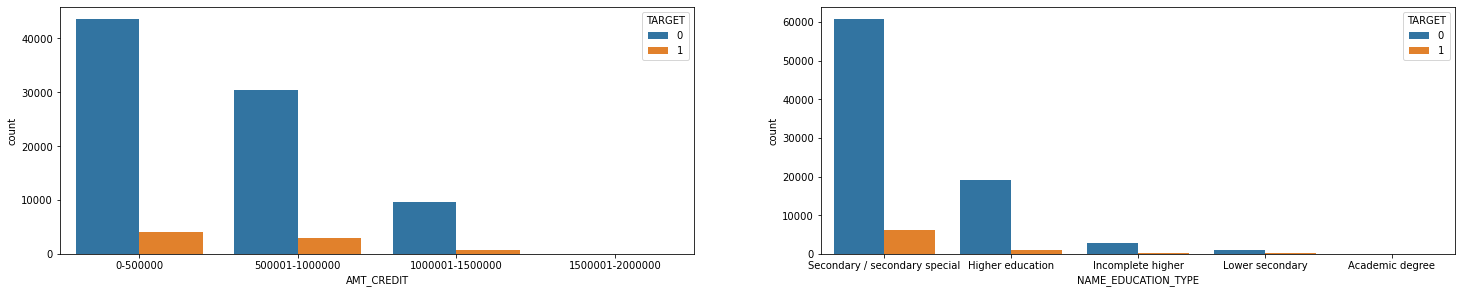

In [42]:
l=[cr,'NAME_EDUCATION_TYPE']
enumerate(l)
list_l=list(enumerate(l))
plt.figure(figsize=(25,10))
for hey in list_l:
    plt.subplot(2,2,hey[0]+1)
    sns.countplot(hey[1],hue='TARGET',data=b_df)
plt.show()

### Interpretation a: Customers who dont have problem paying loan installments have amt_credit mostly upto 500000. However very less customers who have problem paying loan intallments have credit amount in the given range and are likely to be defaulters.

### Interpretation b: Most customers who dont have problem paying loan installments have completed Secondary education and are not likely to be defaulters.

# $$\;Final \ Conclusion$$

### Customers who have difficulty in paying loan intallments on time, take less than 100000 loan on their goods, with low income, who have submitted less than 1 or no document, who don't own a house or a flat, unemployed, student and businessmen, those who have amount amt_credit less than 500000 with less than higher education qualification are likely to become defaulters.

## Final List

In [54]:
df1=b_df[(b_df['TARGET']==0)&(b_df["House"]=='Y') ]
dc=df1[(df1["NAME_CONTRACT_TYPE"]=='Cash loans') & (df1["NAME_INCOME_TYPE"]=='Working')|(df1["NAME_INCOME_TYPE"]=='State servant')|(df1["NAME_INCOME_TYPE"]=='Pensioner')|(df1["NAME_INCOME_TYPE"]=='Commercial associate') & (df1["TOTAL_DOC_SUBMITTED"]>=1)]
dc

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,NAME_FAMILY_STATUS,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,Civil marriage,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,Single / not married,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,Married,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,913500.0,...,Married,1,0,0,1,0,NAN,2.0,WEDNESDAY,1
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,652500.0,...,Married,1,1,0,1,0,Core staff,3.0,SATURDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,216077,0,Cash loans,M,N,Y,0,135000.0,540000.0,540000.0,...,Married,1,1,0,1,0,Managers,2.0,TUESDAY,1
99988,216079,0,Cash loans,M,N,Y,2,135000.0,974794.5,841500.0,...,Married,1,1,0,1,0,Laborers,4.0,FRIDAY,1
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,Married,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,Married,1,1,0,1,0,Managers,3.0,TUESDAY,1


In [55]:
dc.shape

(53025, 23)

In [56]:
dc.to_csv('deserving candidates.csv')